## Lab Project - Smart Quality System
Task:
Help the Kruse GmbH and develop a monitoring system, that identifies the quality of the printing on the product using the historical vibration data and the quality and production log-data.

### Importing Packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import glob
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()
plt.style.use('seaborn')

### Reading CSV files and Data Pre-processing

In [2]:
product_quality_logs_df = pd.read_csv('product_quality_log.csv',index_col=0)
prod_logs_df = pd.read_csv('production_log.csv',index_col=0)
display(product_quality_logs_df)
display(prod_logs_df)

,machine_id,product_id,quality
0,Printer F0815,P3.2.500,OK
1,Printer F0815,P3.2.501,OK
2,Printer F0815,P3.2.502,OK
3,Printer F0815,P3.2.503,OK
4,Printer F0815,P3.2.504,OK
...,...,...,...
1651,Printer F0815,P3.2.2151,nOK
1652,Printer F0815,P3.2.2152,nOK
1653,Printer F0815,P3.2.2153,nOK
1654,Printer F0815,P3.2.2154,nOK


,timestamp,product_id
0,2021-05-17_08-12-48,P3.2.500
1,2021-05-17_08-12-51,P3.2.501
2,2021-05-17_08-12-54,P3.2.502
3,2021-05-17_08-12-57,P3.2.503
4,2021-05-17_08-13-00,P3.2.504
...,...,...
1651,2021-05-17_09-35-21,P3.2.2151
1652,2021-05-17_09-35-24,P3.2.2152
1653,2021-05-17_09-35-27,P3.2.2153
1654,2021-05-17_09-35-30,P3.2.2154


In [3]:
logs_merge_df = pd.merge(prod_logs_df,product_quality_logs_df)
logs_merge_df.index = pd.to_datetime(logs_merge_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
logs_merge_df = logs_merge_df.drop(columns='timestamp')
ok_rows = logs_merge_df.loc[logs_merge_df['quality'] == 'OK']
nok_rows = logs_merge_df.loc[logs_merge_df['quality'] == 'nOK']
pd.set_option('display.max_rows', 100)
display(ok_rows)
display(nok_rows)

,product_id,machine_id,quality
timestamp,,,
2021-05-17 08:12:48,P3.2.500,Printer F0815,OK
2021-05-17 08:12:51,P3.2.501,Printer F0815,OK
2021-05-17 08:12:54,P3.2.502,Printer F0815,OK
2021-05-17 08:12:57,P3.2.503,Printer F0815,OK
2021-05-17 08:13:00,P3.2.504,Printer F0815,OK
...,...,...,...
2021-05-17 09:33:21,P3.2.2111,Printer F0815,OK
2021-05-17 09:33:30,P3.2.2114,Printer F0815,OK
2021-05-17 09:33:42,P3.2.2118,Printer F0815,OK


,product_id,machine_id,quality
timestamp,,,
2021-05-17 09:27:51,P3.2.2001,Printer F0815,nOK
2021-05-17 09:27:57,P3.2.2003,Printer F0815,nOK
2021-05-17 09:28:12,P3.2.2008,Printer F0815,nOK
2021-05-17 09:28:15,P3.2.2009,Printer F0815,nOK
2021-05-17 09:28:21,P3.2.2011,Printer F0815,nOK
2021-05-17 09:28:24,P3.2.2012,Printer F0815,nOK
2021-05-17 09:28:27,P3.2.2013,Printer F0815,nOK
2021-05-17 09:28:39,P3.2.2017,Printer F0815,nOK
2021-05-17 09:28:42,P3.2.2018,Printer F0815,nOK


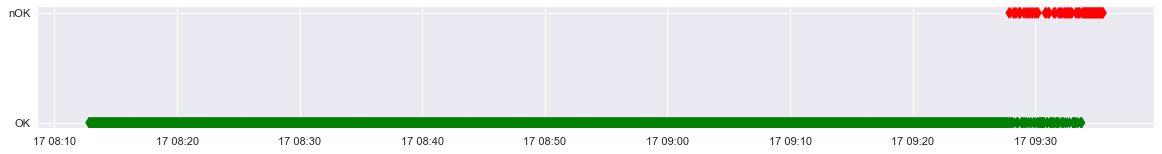

In [4]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
figure(num=None,figsize=(18,2), dpi=80, facecolor='w', edgecolor='k')
cmap = clrs.ListedColormap(['green', 'red'])
plt.yticks([0.0, 1.0], ["OK",
                        "nOK"])
plt.scatter(x = logs_merge_df.index, y= logs_merge_df.quality, c=(logs_merge_df.quality != 'OK').astype(float), marker='d', cmap=cmap)#plt.cm.get_cmap('RdBu'))
plt.savefig('fig0.png', bbox_inches='tight')

## Feature Engineering - Mean 

In [5]:
h3 = [1/3]*3

data_dir = 'vibrationdata'
merged_data_mean_abs = pd.DataFrame()

# Looping over all files
for filename in os.listdir(data_dir):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,2))
    dataset_mean_abs.index = [filename]
    merged_data_mean_abs = merged_data_mean_abs.append(dataset_mean_abs)
    
# Renaming columns
merged_data_mean_abs.columns = ['Sensor 1 mean','Sensor 2 mean']
# Identifying index as datetime format
merged_data_mean_abs.index = pd.to_datetime(merged_data_mean_abs.index, format='%Y-%m-%d_%H-%M-%S')
merged_data_mean_abs = merged_data_mean_abs.sort_index()

In [6]:

h3 = [1/3]*3
h5 = [1/5]*5
#sensor1_mean_filt3 = np.convolve(merged_data_mean_abs['Sensor 1 mean'], h3)
sensor1_mean_filt5 = np.convolve(merged_data_mean_abs['Sensor 1 mean'], h5)
#sensor2_mean_filt3 = np.convolve(merged_data_mean_abs['Sensor 2 mean'], h3)
sensor2_mean_filt5 = np.convolve(merged_data_mean_abs['Sensor 2 mean'], h5)

In [7]:
#Run Only 1 time!
merged_data_mean_abs.drop(merged_data_mean_abs.head(2).index, inplace=True)
merged_data_mean_abs.drop(merged_data_mean_abs.tail(2).index, inplace=True)

In [9]:

merged_data_mean_abs['Sensor 1 mean'] = sensor1_mean_filt5[4:-4]
merged_data_mean_abs['Sensor 2 mean'] = sensor2_mean_filt5[4:-4]

In [10]:
# Check - Begining of Data
display(merged_data_mean_abs)
display(merged_data_mean_abs.head())
display(merged_data_mean_abs.tail())

,Sensor 1 mean,Sensor 2 mean
2021-05-17 08:12:54,0.126005,0.121680
2021-05-17 08:12:57,0.126296,0.121828
2021-05-17 08:13:00,0.126362,0.122165
2021-05-17 08:13:03,0.126200,0.122019
2021-05-17 08:13:06,0.126508,0.122194
...,...,...
2021-05-17 09:35:15,0.150475,0.138158
2021-05-17 09:35:18,0.150775,0.138359
2021-05-17 09:35:21,0.153338,0.140588
2021-05-17 09:35:24,0.156693,0.143702


,Sensor 1 mean,Sensor 2 mean
2021-05-17 08:12:54,0.126005,0.121680
2021-05-17 08:12:57,0.126296,0.121828
2021-05-17 08:13:00,0.126362,0.122165
2021-05-17 08:13:03,0.126200,0.122019
2021-05-17 08:13:06,0.126508,0.122194


,Sensor 1 mean,Sensor 2 mean
2021-05-17 09:35:15,0.150475,0.138158
2021-05-17 09:35:18,0.150775,0.138359
2021-05-17 09:35:21,0.153338,0.140588
2021-05-17 09:35:24,0.156693,0.143702
2021-05-17 09:35:27,0.158182,0.146836


Total Data Points 1653


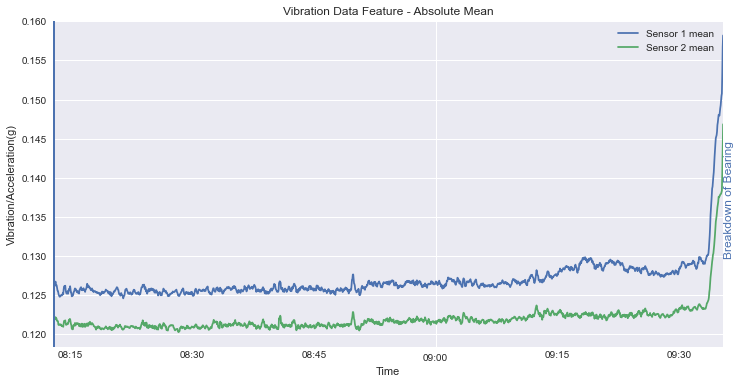

In [11]:
# Visualising Data
ax = merged_data_mean_abs.plot(figsize = (12,6), title="Vibration Data Feature - Absolute Mean" , legend = True)
ax.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")
plt.axvline(x='2021-05-17 08:12:48', linewidth=4, color='b', label ="Breakdown of Bearing")
plt.text('2021-05-17 09:35:33',0.13,'Breakdown of Bearing',rotation=90, fontsize=12, color='b')
plt.savefig('fig1.png', bbox_inches='tight')
print(f'Total Data Points {merged_data_mean_abs.shape[0] + 1}')

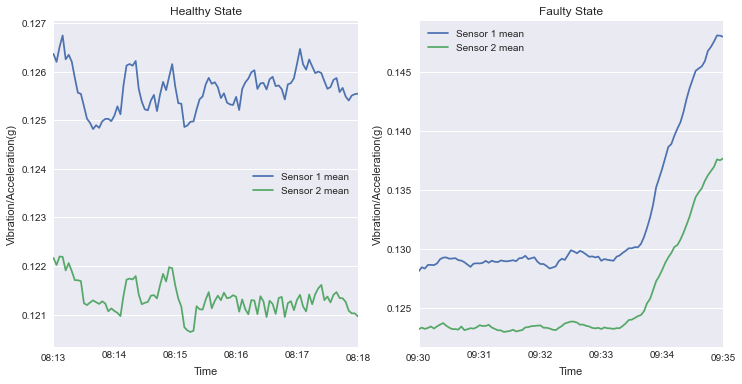

In [12]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

healthy = merged_data_mean_abs['2021-05-17 08:13:00':'2021-05-17 08:18:00']
healthy.plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data_mean_abs['2021-05-17 09:30:00':'2021-05-17 09:35:00']
ax2 = faulty.plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")
plt.savefig('fig2.png', bbox_inches='tight')

## Feature Engineering - Standard Deviation

In [13]:
data_dir = 'vibrationdata'
merged_data_std = pd.DataFrame()

# Looping over all files
for filename in os.listdir(data_dir):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_std = np.array(dataset.std())
    dataset_std = pd.DataFrame(dataset_std.reshape(1,2))
    dataset_std.index = [filename]
    merged_data_std = merged_data_std.append(dataset_std)
    
# Renaming columns
merged_data_std.columns = ['Sensor 1 std','Sensor 2 std']
# Identifying index as datetime format
merged_data_std.index = pd.to_datetime(merged_data_std.index, format='%Y-%m-%d_%H-%M-%S')
merged_data_std = merged_data_std.sort_index()

In [14]:
 h3 = [1/3]*3
h5 = [1/5]*5
#sensor1_std_filt3 = np.convolve(merged_data_std['Sensor 1 std'], h3)
sensor1_std_filt5 = np.convolve(merged_data_std['Sensor 1 std'], h5)
#sensor2_std_filt3 = np.convolve(merged_data_std['Sensor 2 std'], h3)
sensor2_std_filt5 = np.convolve(merged_data_std['Sensor 2 std'], h5)

In [15]:

merged_data_std['Sensor 1 std'] = sensor1_std_filt5[2:-2]
merged_data_std['Sensor 2 std'] = sensor2_std_filt5[2:-2]

In [16]:
#Run only 1 time!
merged_data_std.drop(merged_data_std.head(2).index, inplace=True)
merged_data_std.drop(merged_data_std.tail(2).index, inplace=True)

In [17]:
# Check - Begining of Data
display(merged_data_std)

,Sensor 1 std,Sensor 2 std
2021-05-17 08:12:54,0.093981,0.080087
2021-05-17 08:12:57,0.094357,0.080137
2021-05-17 08:13:00,0.094493,0.080488
2021-05-17 08:13:03,0.094601,0.080204
2021-05-17 08:13:06,0.094558,0.080275
...,...,...
2021-05-17 09:35:15,0.144422,0.117286
2021-05-17 09:35:18,0.145130,0.117328
2021-05-17 09:35:21,0.149401,0.122501
2021-05-17 09:35:24,0.154573,0.128813


Total Data Points 1653


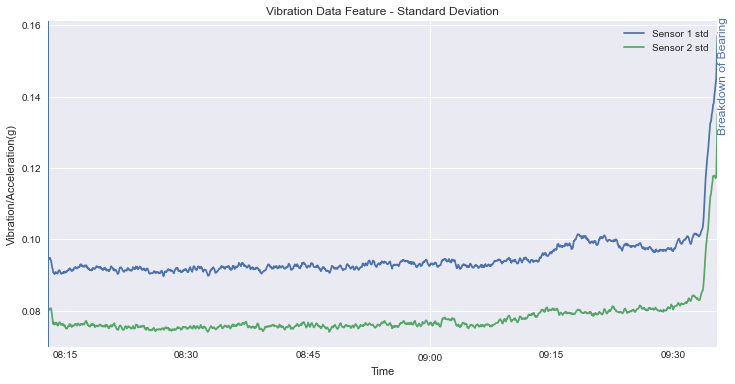

In [18]:
# Visualising Data
ax = merged_data_std.plot(figsize = (12,6), title="Vibration Data Feature - Standard Deviation" , legend = True)
ax.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")
plt.axvline(x='2021-05-17 08:12:48', linewidth=4, color='b', label ="Breakdown of Bearing")
plt.text('2021-05-17 09:35:33',0.13,'Breakdown of Bearing',rotation=90, fontsize=12, color='b')
print(f'Total Data Points {merged_data_std.shape[0] + 1}')
plt.savefig('fig3.png', bbox_inches='tight')

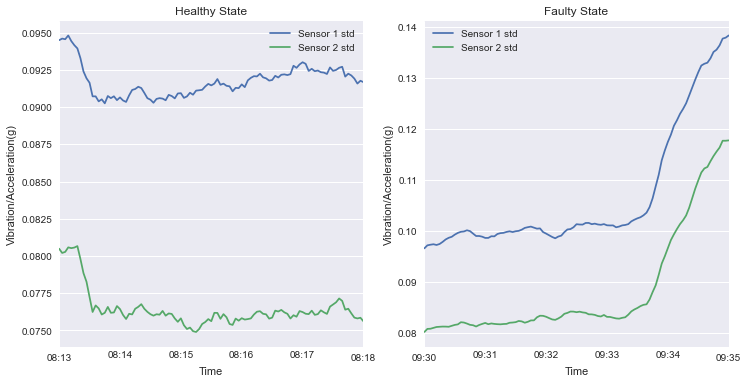

In [19]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

healthy = merged_data_std['2021-05-17 08:13:00':'2021-05-17 08:18:00']
healthy.plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data_std['2021-05-17 09:30:00':'2021-05-17 09:35:00']
ax2 = faulty.plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")
plt.savefig('fig4.png', bbox_inches='tight')

## Feature Engineering - Variance

In [20]:
data_dir = 'vibrationdata'
merged_data_var = pd.DataFrame()

# Looping over all files
for filename in os.listdir(data_dir):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_var = np.array(dataset.var())
    dataset_var = pd.DataFrame(dataset_var.reshape(1,2))
    dataset_var.index = [filename]
    merged_data_var = merged_data_var.append(dataset_var)
    
# Renaming columns
merged_data_var.columns = ['Sensor 1 var','Sensor 2 var']
# Identifying index as datetime format
merged_data_var.index = pd.to_datetime(merged_data_var.index, format='%Y-%m-%d_%H-%M-%S')
merged_data_var = merged_data_var.sort_index()

In [21]:
 h3 = [1/3]*3
h5 = [1/5]*5
#sensor1_std_filt3 = np.convolve(merged_data_std['Sensor 1 std'], h3)
sensor1_var_filt5 = np.convolve(merged_data_var['Sensor 1 var'], h5)
#sensor2_std_filt3 = np.convolve(merged_data_std['Sensor 2 std'], h3)
sensor2_var_filt5 = np.convolve(merged_data_var['Sensor 2 var'], h5)

In [22]:

merged_data_var['Sensor 1 var'] = sensor1_var_filt5[2:-2]
merged_data_var['Sensor 2 var'] = sensor1_var_filt5[2:-2]

In [23]:
#Run only 1 time!
merged_data_var.drop(merged_data_var.head(2).index, inplace=True)
merged_data_var.drop(merged_data_var.tail(2).index, inplace=True)

In [24]:
# Check - Begining of Data
display(merged_data_var)

,Sensor 1 var,Sensor 2 var
2021-05-17 08:12:54,0.008833,0.008833
2021-05-17 08:12:57,0.008903,0.008903
2021-05-17 08:13:00,0.008929,0.008929
2021-05-17 08:13:03,0.008949,0.008949
2021-05-17 08:13:06,0.008941,0.008941
...,...,...
2021-05-17 09:35:15,0.020859,0.020859
2021-05-17 09:35:18,0.021064,0.021064
2021-05-17 09:35:21,0.022378,0.022378
2021-05-17 09:35:24,0.024013,0.024013


Total Data Points 1653


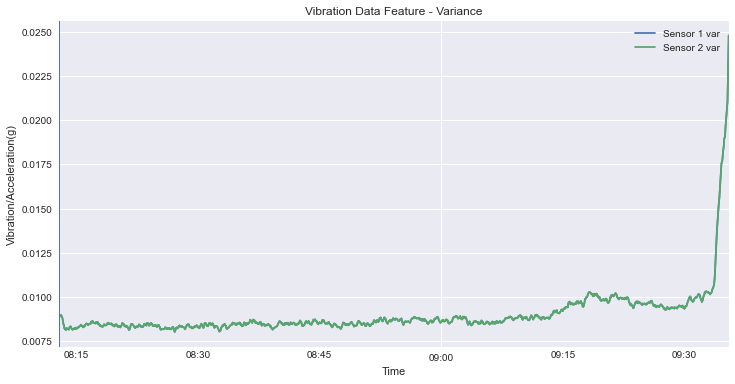

In [25]:
# Visualising Data
ax = merged_data_var.plot(figsize = (12,6), title="Vibration Data Feature - Variance" , legend = True)
ax.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")
plt.axvline(x='2021-05-17 08:12:48', linewidth=4, color='b', label ="Breakdown of Bearing")
# plt.text('2021-05-17 09:35:33',0.13,'Breakdown of Bearing',rotation=90, fontsize=12, color='b')
print(f'Total Data Points {merged_data_std.shape[0] + 1}')
plt.savefig('fig3.png', bbox_inches='tight')

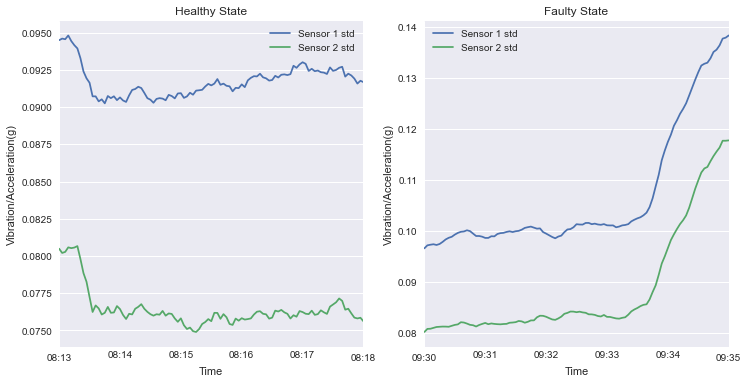

In [26]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

healthy = merged_data_std['2021-05-17 08:13:00':'2021-05-17 08:18:00']
healthy.plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data_std['2021-05-17 09:30:00':'2021-05-17 09:35:00']
ax2 = faulty.plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Time", ylabel="Vibration/Acceleration(g)")
plt.savefig('fig4.png', bbox_inches='tight')

## Merging of Datasets

In [27]:
#run only 1 time!
logs_merge_df.drop(logs_merge_df.head(2).index, inplace=True)
logs_merge_df.drop(logs_merge_df.tail(2).index, inplace=True)

In [28]:
vibration_data_df = pd.DataFrame()
vibration_data_df = merged_data_mean_abs.join(merged_data_std)
display(vibration_data_df)
mean_std_df =  logs_merge_df.join(vibration_data_df)
display(mean_std_df)

,Sensor 1 mean,Sensor 2 mean,Sensor 1 std,Sensor 2 std
2021-05-17 08:12:54,0.126005,0.121680,0.093981,0.080087
2021-05-17 08:12:57,0.126296,0.121828,0.094357,0.080137
2021-05-17 08:13:00,0.126362,0.122165,0.094493,0.080488
2021-05-17 08:13:03,0.126200,0.122019,0.094601,0.080204
2021-05-17 08:13:06,0.126508,0.122194,0.094558,0.080275
...,...,...,...,...
2021-05-17 09:35:15,0.150475,0.138158,0.144422,0.117286
2021-05-17 09:35:18,0.150775,0.138359,0.145130,0.117328
2021-05-17 09:35:21,0.153338,0.140588,0.149401,0.122501
2021-05-17 09:35:24,0.156693,0.143702,0.154573,0.128813


,product_id,machine_id,quality,Sensor 1 mean,Sensor 2 mean,Sensor 1 std,Sensor 2 std
timestamp,,,,,,,
2021-05-17 08:12:54,P3.2.502,Printer F0815,OK,0.126005,0.121680,0.093981,0.080087
2021-05-17 08:12:57,P3.2.503,Printer F0815,OK,0.126296,0.121828,0.094357,0.080137
2021-05-17 08:13:00,P3.2.504,Printer F0815,OK,0.126362,0.122165,0.094493,0.080488
2021-05-17 08:13:03,P3.2.505,Printer F0815,OK,0.126200,0.122019,0.094601,0.080204
2021-05-17 08:13:06,P3.2.506,Printer F0815,OK,0.126508,0.122194,0.094558,0.080275
...,...,...,...,...,...,...,...
2021-05-17 09:35:15,P3.2.2149,Printer F0815,nOK,0.150475,0.138158,0.144422,0.117286
2021-05-17 09:35:18,P3.2.2150,Printer F0815,nOK,0.150775,0.138359,0.145130,0.117328
2021-05-17 09:35:21,P3.2.2151,Printer F0815,nOK,0.153338,0.140588,0.149401,0.122501


### Defining the parameters of mean and standard deviation for Data Exploration

In [29]:
xm=mean_std_df['Sensor 1 mean']
ym=mean_std_df['Sensor 2 mean']

xm_h = xm['2021-05-17 08:13:00':'2021-05-17 08:18:00'] #healthy state
ym_h = ym['2021-05-17 08:13:00':'2021-05-17 08:18:00'] #healthy state
xm_f = xm['2021-05-17 09:30:00':'2021-05-17 09:35:00'] #faulty state
ym_f = ym['2021-05-17 09:30:00':'2021-05-17 09:35:00'] #faulty state

xs=mean_std_df['Sensor 1 std']
ys=mean_std_df['Sensor 2 std']

xs_h = xs['2021-05-17 08:13:00':'2021-05-17 08:18:00'] #healthy state
ys_h = ys['2021-05-17 08:13:00':'2021-05-17 08:18:00'] #healthy state
xs_f = xs['2021-05-17 09:30:00':'2021-05-17 09:35:00'] #faulty state
ys_f = ys['2021-05-17 09:30:00':'2021-05-17 09:35:00'] #faulty state


## Data Exploration

### Visualization of the absolute mean value feature

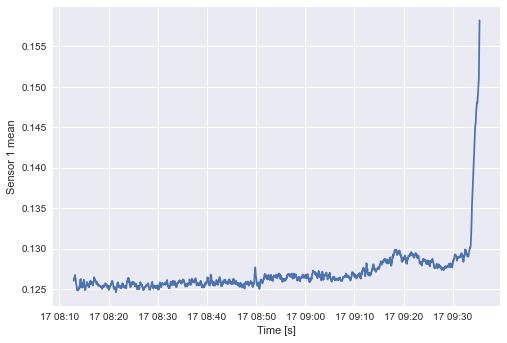

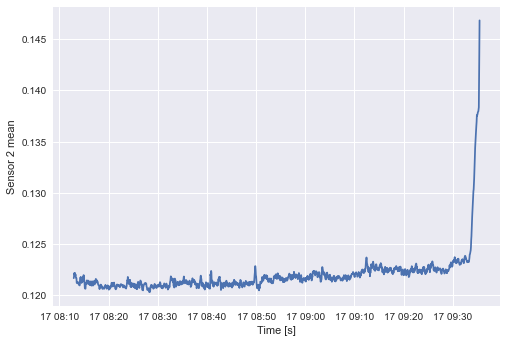

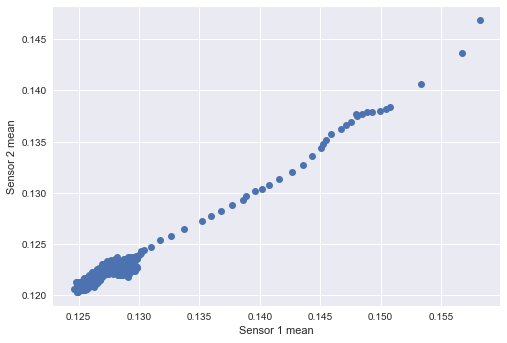

In [30]:
plt.ylabel("Sensor 1 mean")
plt.xlabel("Time [s]")
plt.plot(xm)
plt.show()

plt.ylabel("Sensor 2 mean")
plt.xlabel("Time [s]")
plt.plot(ym)
plt.show()

plt.ylabel("Sensor 2 mean")
plt.xlabel("Sensor 1 mean") 
plt.plot(xm,ym, 'o')
plt.savefig('fig_m.png',bbox_inches='tight')
plt.show()

## K-Means Clustering

(0.12292314517310401,
 0.15986057473509555,
 0.11898184139850464,
 0.14816234532936276)

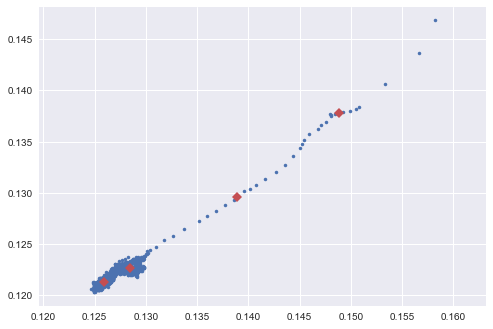

In [31]:
from sklearn.cluster import KMeans

## create multidimensional feature space
XY = np.array([xm, ym]).transpose()
XY
## perform clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'rD')
plt.savefig('fig_m.png',bbox_inches='tight')
plt.axis('equal')

## Principle Component Analysis

[0.99142644 0.00857356]


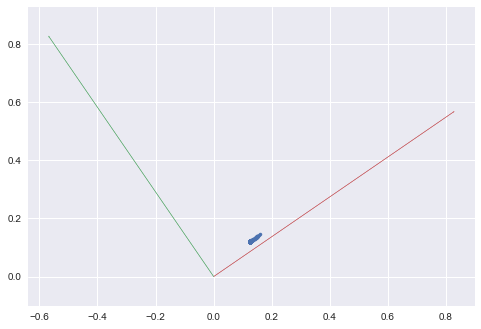

In [32]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.arrow(0,0, pca.components_[0,0], pca.components_[0,1], color='r')
plt.arrow(0,0, pca.components_[1,0], pca.components_[1,1], color='g')
plt.axis('equal')

print(pca.explained_variance_ratio_)


### Visualization of the Healthy State

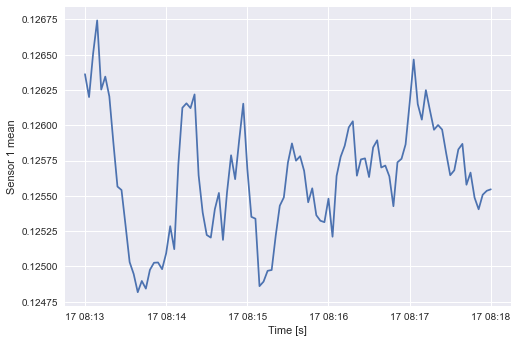

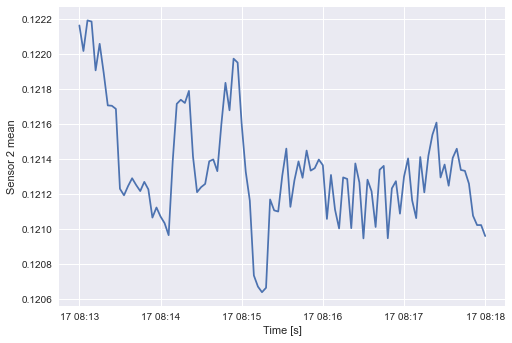

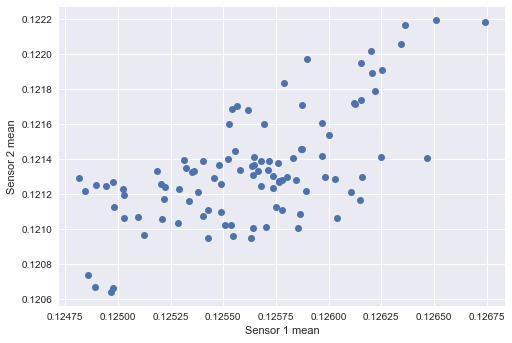

In [33]:
plt.ylabel("Sensor 1 mean")
plt.xlabel("Time [s]")
plt.plot(xm_h)
plt.show()

plt.ylabel("Sensor 2 mean")
plt.xlabel("Time [s]")
plt.plot(ym_h)
plt.show()

plt.ylabel("Sensor 2 mean")
plt.xlabel("Sensor 1 mean")
plt.plot(xm_h,ym_h, 'o')
plt.savefig('fig_h.png',bbox_inches='tight')
plt.show()

### K-Means Clustering

(0.12472050393085542,
 0.12683961130914584,
 0.12056375360124924,
 0.12227129693832645)

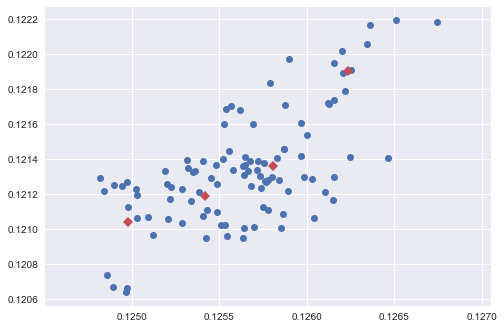

In [34]:
from sklearn.cluster import KMeans

## create multidimensional feature space
XY = np.array([xm_h, ym_h]).transpose()
XY
## perform clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'bo')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'rD')
plt.savefig('fig_h.png',bbox_inches='tight')
plt.axis('equal')

### Principle Component Analysis

[0.84294159 0.15705841]


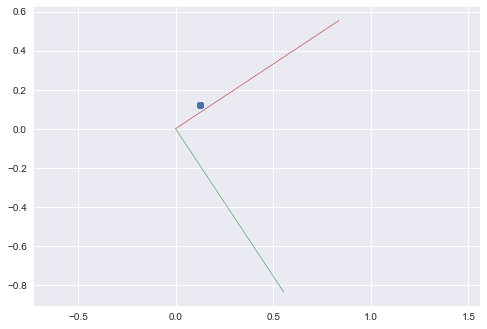

In [35]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'bo')
plt.arrow(0,0, pca.components_[0,0], pca.components_[0,1], color='r')
plt.arrow(0,0, pca.components_[1,0], pca.components_[1,1], 
          color='g')
plt.axis('equal')

print(pca.explained_variance_ratio_)

### Visualizing of the Faulty State

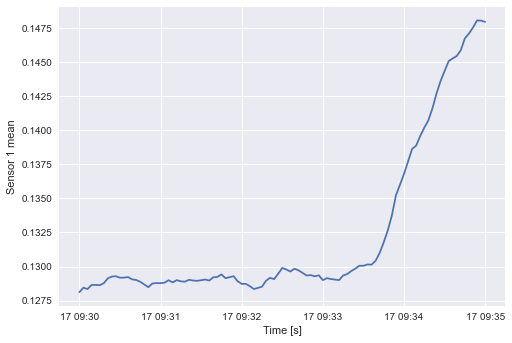

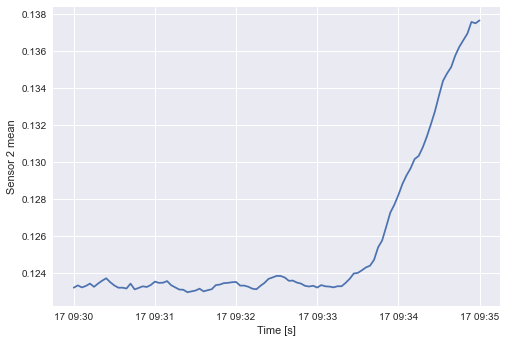

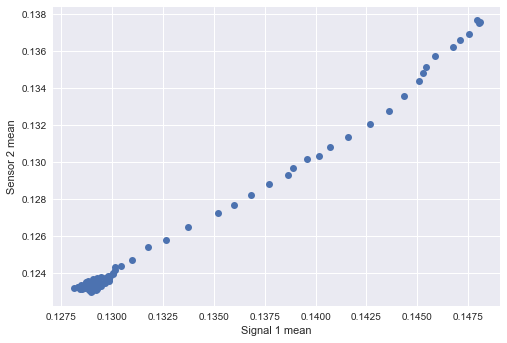

In [36]:
plt.ylabel("Sensor 1 mean")
plt.xlabel("Time [s]")
plt.plot(xm_f)
plt.show()

plt.ylabel("Sensor 2 mean")
plt.xlabel("Time [s]")
plt.plot(ym_f)
plt.show()

plt.ylabel("Sensor 2 mean")
plt.xlabel("Signal 1 mean")
plt.plot(xm_f,ym_f, 'o')
plt.show()

### K-Means Clustering

(0.1271196415840618,
 0.14905288637140512,
 0.12224555642365333,
 0.13839061721763746)

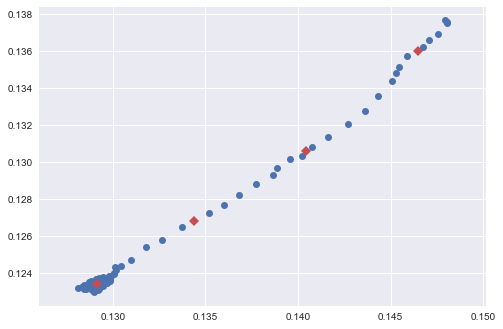

In [37]:
from sklearn.cluster import KMeans

## create multidimensional feature space
XY = np.array([xm_f, ym_f]).transpose()
XY
## perform clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'bo')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'rD')
plt.savefig('fig_f.png',bbox_inches='tight')
plt.axis('equal')

### Principle Component Analysis

[0.99830058 0.00169942]


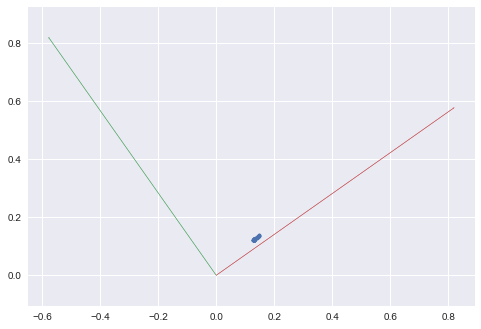

In [38]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.arrow(0,0, pca.components_[0,0], pca.components_[0,1], color='r')
plt.arrow(0,0, pca.components_[1,0], pca.components_[1,1], 
          color='g')
plt.axis('equal')

print(pca.explained_variance_ratio_)

### Visualizing of the Standard Deviation Feature

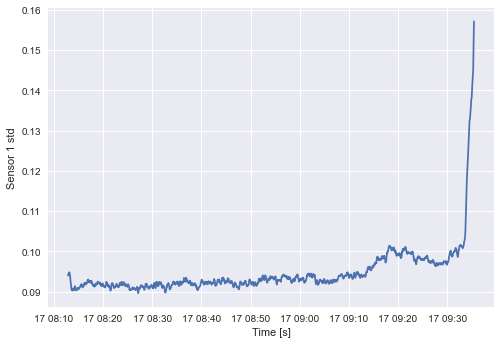

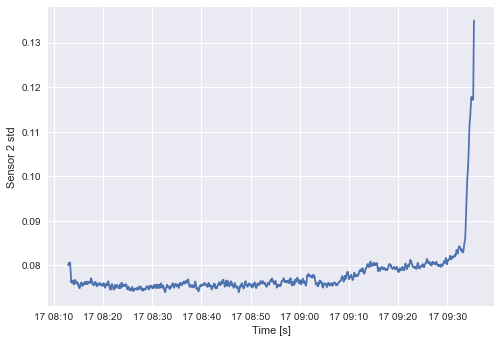

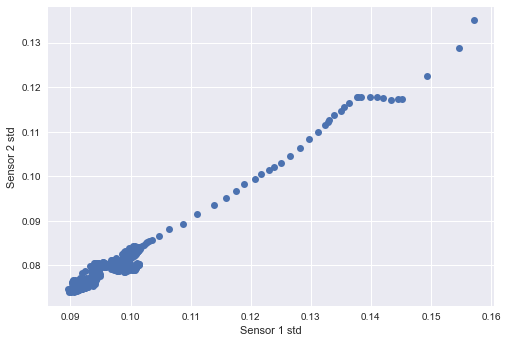

In [39]:
plt.ylabel("Sensor 1 std")
plt.xlabel("Time [s]")
plt.plot(xs)
plt.show()

plt.ylabel("Sensor 2 std")
plt.xlabel("Time [s]")
plt.plot(ys)
plt.show()

plt.ylabel("Sensor 2 std")
plt.xlabel("Sensor 1 std")
plt.plot(xs,ys, 'o')
plt.show()

### K-Means Clustering

(0.08622964678869086,
 0.1605167573218605,
 0.07095169787929131,
 0.13802050809857955)

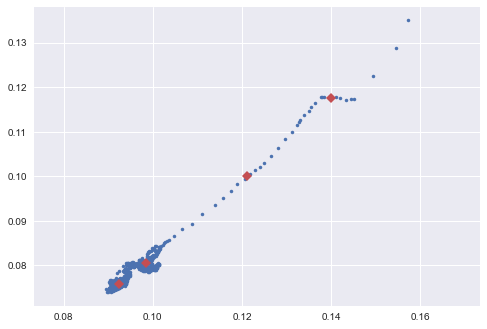

In [40]:
from sklearn.cluster import KMeans

## create multidimensional feature space
XY = np.array([xs, ys]).transpose()
XY
## perform clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'rD')
plt.savefig('fig_s.png',bbox_inches='tight')
plt.axis('equal')

### Principle Component Analysis

[0.99129996 0.00870004]


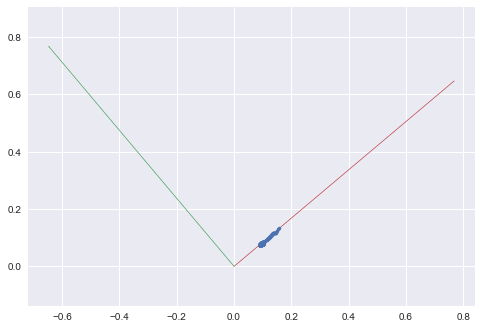

In [41]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.arrow(0,0, pca.components_[0,0], pca.components_[0,1], color='r')
plt.arrow(0,0, pca.components_[1,0], pca.components_[1,1], 
          color='g')
plt.axis('equal')

print(pca.explained_variance_ratio_)

# Modelling

## Load Data Set as Pandas and performing Class Distribution

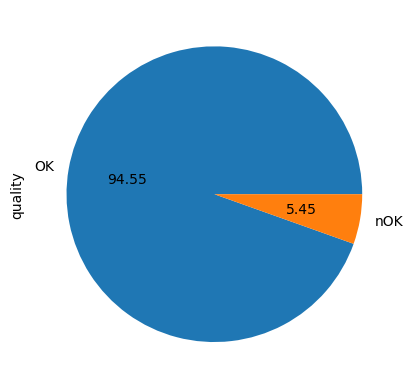

In [42]:
plt.style.use('default')
df = mean_std_df
df['quality'] = df['quality'].astype('category')
dummy = pd.get_dummies(df['quality'])
temp_df = pd.concat((df,dummy), axis=1)
quality_count = temp_df['quality'].value_counts().plot.pie(autopct="%.2f")
temp_df = temp_df.drop(['nOK','product_id','machine_id','quality'],axis=1)
temp_df = temp_df.rename(columns={'OK':'target'})
df = temp_df
df
plt.savefig('fig_pie.png',bbox_inches='tight')

## Data Splitting: Test-train-split

No. of Training samples: 1321
No. of Test samples: 331


(1321, 4)

(331, 4)

(1321,)

(331,)

<AxesSubplot:ylabel='target'>

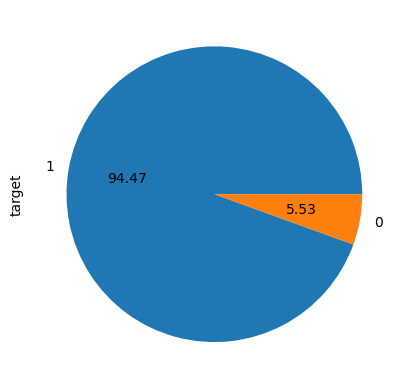

In [43]:
from sklearn.model_selection import train_test_split
# define dataset
plt.style.use('default')
feature_names = ['Sensor 1 mean','Sensor 2 mean','Sensor 1 std','Sensor 2 std']
X, y = df[feature_names], df['target']
# Split training / test set one (typically you would prefer multiple splitting / cross volidation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("No. of Training samples: {}\nNo. of Test samples: {}".format(len(X_train), len(X_test)))
display(X_train.shape, X_test.shape,  y_train.shape, y_test.shape)
y_train.value_counts().plot.pie(autopct="%.2f")

## Class Balancing

### Random undersampling with strategy "Majority"

Counter({1: 1562, 0: 90})
Counter({0: 73, 1: 73})


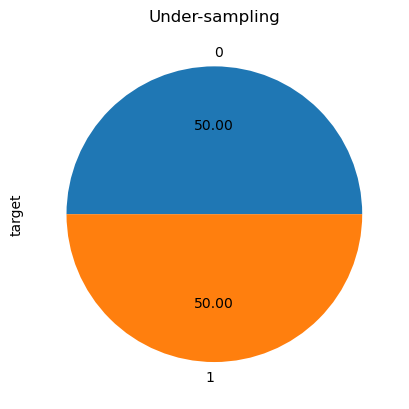

In [44]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# summarize class distribution
print(Counter(y))
# define undersample strategy
rus = RandomUnderSampler(sampling_strategy="majority")
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# summarize class distribution
ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
print(Counter(y_train_rus))

### Random Oversampling with strategy "Minority"

Counter({1: 1562, 0: 90})
Counter({0: 73, 1: 73})


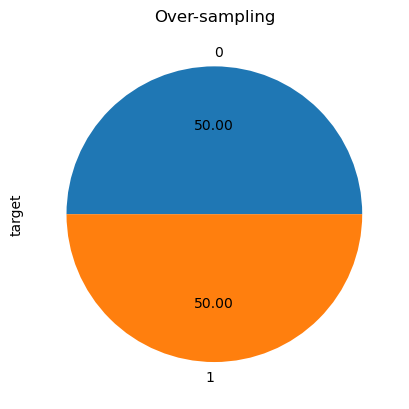

In [45]:
# example of random undersampling to balance the class distribution
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


# summarize class distribution
print(Counter(y))

# define undersample strategy
ros = RandomOverSampler(sampling_strategy="minority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# summarize class distribution
ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
print(Counter(y_train_rus))

### Random undersampling with strategy "0.5"

Counter({1: 1562, 0: 90})
Counter({1: 146, 0: 73})


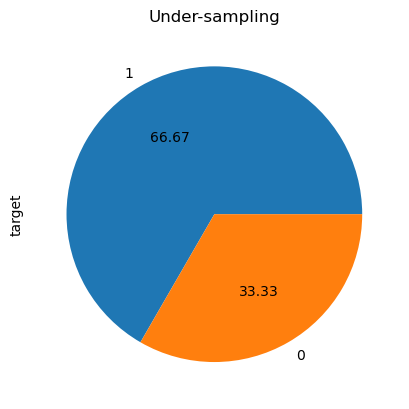

In [46]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# summarize class distribution
print(Counter(y))
# define undersample strategy
rus_numeric = RandomUnderSampler(sampling_strategy=0.5)
X_train_rus_numeric, y_train_rus_numeric = rus_numeric.fit_resample(X_train, y_train)

# summarize class distribution
ax = y_train_rus_numeric.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
print(Counter(y_train_rus_numeric))

## K-Nearest Neighbour Classifier

### KNN Model with without balanced class

(1321, 4)

(1321,)

              precision    recall  f1-score   support

         nOK       0.62      0.59      0.61        17
          OK       0.98      0.98      0.98       314

    accuracy                           0.96       331
   macro avg       0.80      0.78      0.79       331
weighted avg       0.96      0.96      0.96       331



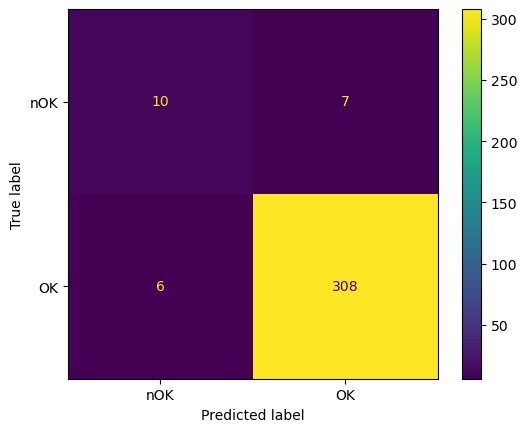

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
display(X_train.shape, y_train.shape)

# Testing of the KNN Classifier
y_test_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plt.style.use('default')
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, y_test_pred, target_names=["nOK","OK"]))

### KNN Model with undersampled balanced class

(146, 4)

(146,)

              precision    recall  f1-score   support

         nOK       0.44      0.82      0.57        17
          OK       0.99      0.94      0.97       314

    accuracy                           0.94       331
   macro avg       0.71      0.88      0.77       331
weighted avg       0.96      0.94      0.95       331



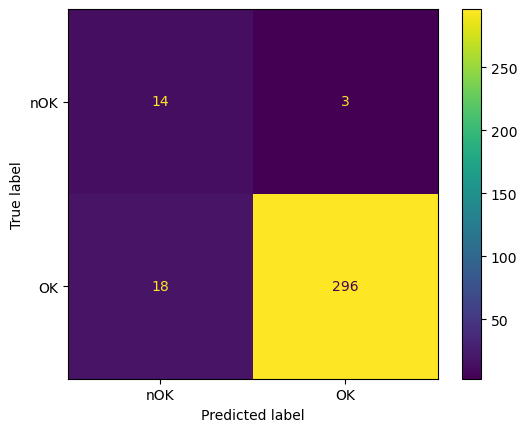

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_rus, y_train_rus)
display(X_train_rus.shape, y_train_rus.shape)

# Testing of the KNN Classifier
y_test_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plt.style.use('default')
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, y_test_pred, target_names=["nOK","OK"]))

### KNN Model with oversampled balanced class

(2496, 4)

(2496,)

              precision    recall  f1-score   support

         nOK       0.64      0.94      0.76        17
          OK       1.00      0.97      0.98       314

    accuracy                           0.97       331
   macro avg       0.82      0.96      0.87       331
weighted avg       0.98      0.97      0.97       331



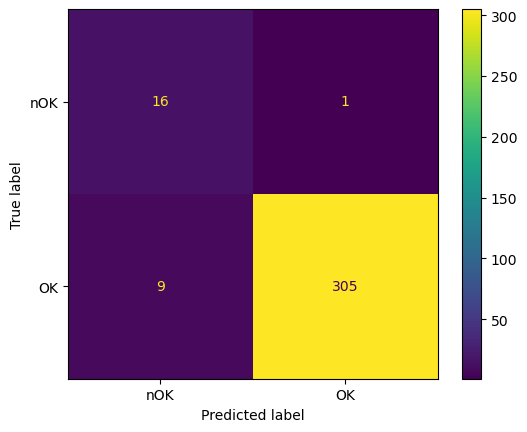

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_ros, y_train_ros)
display(X_train_ros.shape, y_train_ros.shape)

# Testing of the KNN Classifier
y_test_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plt.style.use('default')
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, y_test_pred, target_names=["nOK","OK"]))

### KNN Model with undersampling strategy '0.5' balanced class

(219, 4)

(219,)

              precision    recall  f1-score   support

         nOK       0.52      0.88      0.65        17
          OK       0.99      0.96      0.97       314

    accuracy                           0.95       331
   macro avg       0.76      0.92      0.81       331
weighted avg       0.97      0.95      0.96       331



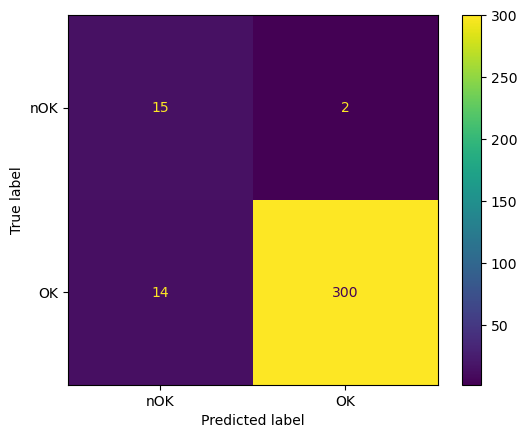

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_rus_numeric, y_train_rus_numeric)
display(X_train_rus_numeric.shape, y_train_rus_numeric.shape)

# Testing of the KNN Classifier
y_test_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plt.style.use('default')
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, y_test_pred, target_names=["nOK","OK"]))

### KNN Classifier with SMOTE sampling

(2496, 4)

(2496,)

              precision    recall  f1-score   support

         nOK       0.63      1.00      0.77        17
          OK       1.00      0.97      0.98       314

    accuracy                           0.97       331
   macro avg       0.81      0.98      0.88       331
weighted avg       0.98      0.97      0.97       331



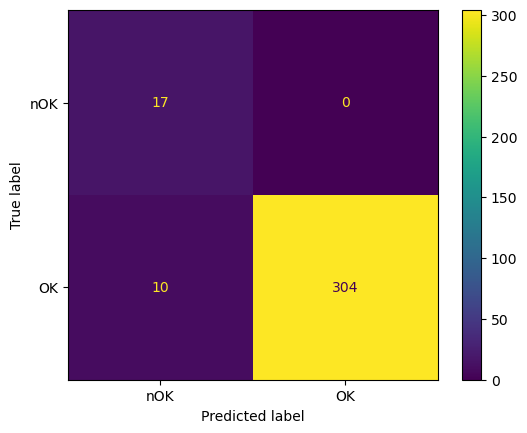

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Training of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_sm, y_train_sm)
display(X_train_sm.shape, y_train_sm.shape)

# Testing of the KNN Classifier
y_test_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plt.style.use('default')
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, y_test_pred, target_names=["nOK","OK"]))

### SVM Training & Testing with Cross-Validation

### SVM without class balancing

[0.93984962 0.9469697  0.9469697  0.9469697  0.9469697  0.9469697
 0.9469697  0.9469697  0.93939394 0.93939394]
Average Score: 0.9447425381635908
0.9486404833836858
              precision    recall  f1-score   support

         nOK       0.00      0.00      0.00        17
          OK       0.95      1.00      0.97       314

    accuracy                           0.95       331
   macro avg       0.47      0.50      0.49       331
weighted avg       0.90      0.95      0.92       331



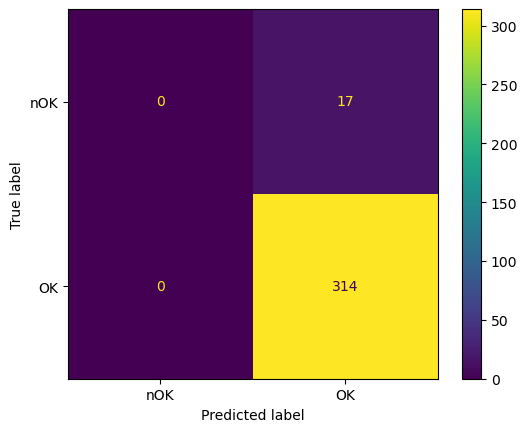

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

# Training and Cross Validation
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5)
svm_classifier.fit(X_train,y_train)
scores = cross_val_score(svm_classifier, X_train, y_train, cv=10, scoring='accuracy')
# for possible metrics, see https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
print(scores)
print("Average Score: {}".format(np.mean(scores)))
predictions = svm_classifier.predict(X_test)
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, predictions, target_names=["nOK","OK"]))

### SVM with undersampling

[0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.57142857 0.78571429 0.64285714 0.71428571]
Average Score: 0.5514285714285714
              precision    recall  f1-score   support

         nOK       1.00      0.12      0.21        17
          OK       0.95      1.00      0.98       314

    accuracy                           0.95       331
   macro avg       0.98      0.56      0.59       331
weighted avg       0.96      0.95      0.94       331



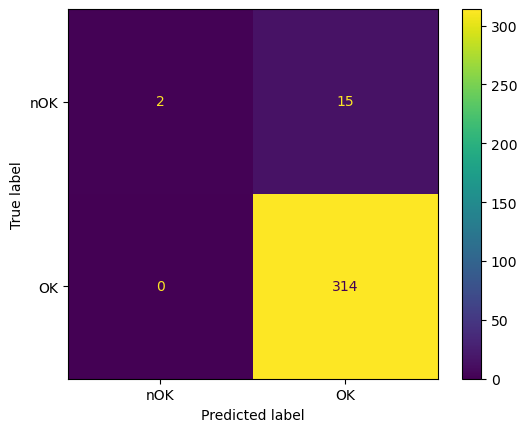

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# Training and Cross Validation
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5)
svm_classifier.fit(X_train_rus,y_train_rus)
scores = cross_val_score(svm_classifier, X_train_rus, y_train_rus, cv=10, scoring='accuracy')
# for possible metrics, see https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
print(scores)
print("Average Score: {}".format(np.mean(scores)))
predictions = svm_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, predictions, target_names=["nOK","OK"]))

### SVM with oversampling

[0.692      0.7        0.632      0.708      0.716      0.668
 0.64658635 0.66666667 0.6746988  0.67068273]
Average Score: 0.6774634538152611
              precision    recall  f1-score   support

         nOK       1.00      0.18      0.30        17
          OK       0.96      1.00      0.98       314

    accuracy                           0.96       331
   macro avg       0.98      0.59      0.64       331
weighted avg       0.96      0.96      0.94       331



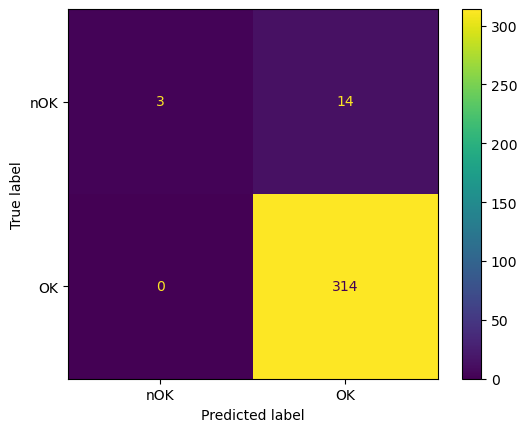

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# Training and Cross Validation
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5)
svm_classifier.fit(X_train_ros,y_train_ros)
scores = cross_val_score(svm_classifier, X_train_ros, y_train_ros, cv=10, scoring='accuracy')
# for possible metrics, see https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
print(scores)
print("Average Score: {}".format(np.mean(scores)))
predictions = svm_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, predictions, target_names=["nOK","OK"]))

### SVM with undersampling strategy of 0.5 

[0.63636364 0.63636364 0.63636364 0.68181818 0.68181818 0.68181818
 0.68181818 0.68181818 0.68181818 0.66666667]
Average Score: 0.6666666666666667
0.9486404833836858
              precision    recall  f1-score   support

         nOK       0.00      0.00      0.00        17
          OK       0.95      1.00      0.97       314

    accuracy                           0.95       331
   macro avg       0.47      0.50      0.49       331
weighted avg       0.90      0.95      0.92       331



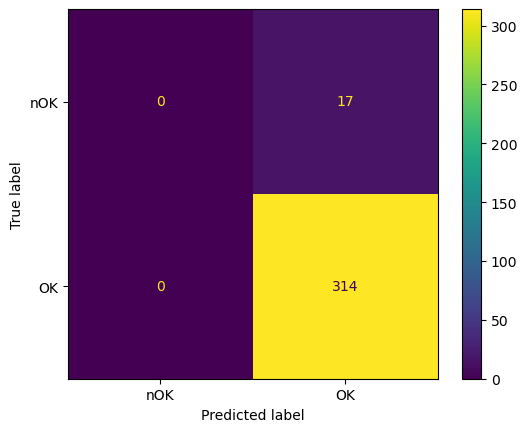

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# Training and Cross Validation
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5)
svm_classifier.fit(X_train_rus_numeric,y_train_rus_numeric)
scores = cross_val_score(svm_classifier, X_train_rus_numeric, y_train_rus_numeric, cv=10, scoring='accuracy')
# for possible metrics, see https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
print(scores)
print("Average Score: {}".format(np.mean(scores)))
predictions = svm_classifier.predict(X_test)
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, predictions, target_names=["nOK","OK"]))

### SVM with SMOTE Sampling 

[0.68       0.664      0.668      0.7        0.716      0.664
 0.6626506  0.69477912 0.69477912 0.68273092]
Average Score: 0.6826939759036144
0.9607250755287009
              precision    recall  f1-score   support

         nOK       1.00      0.24      0.38        17
          OK       0.96      1.00      0.98       314

    accuracy                           0.96       331
   macro avg       0.98      0.62      0.68       331
weighted avg       0.96      0.96      0.95       331



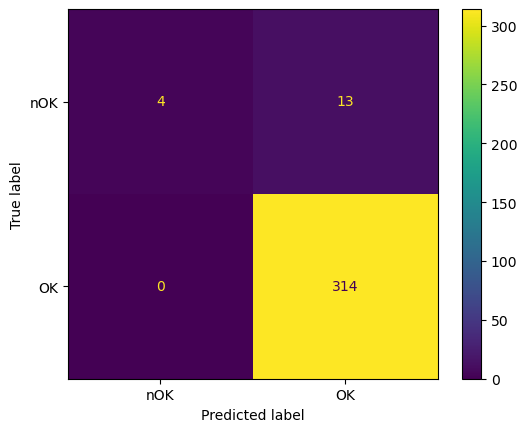

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Training and Cross Validation
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5)
svm_classifier.fit(X_train_sm,y_train_sm)
scores = cross_val_score(svm_classifier, X_train_sm, y_train_sm, cv=10, scoring='accuracy')
# for possible metrics, see https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
print(scores)
print("Average Score: {}".format(np.mean(scores)))
predictions = svm_classifier.predict(X_test)

print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels=["nOK","OK"]).plot()
print(classification_report(y_test, predictions, target_names=["nOK","OK"]))

## Random Forest Training & Testing with Cross-Validation

### Random Forest without class balancing

In [75]:
# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

randforest_classifier = RandomForestClassifier(n_estimators=50,max_depth=10)
randforest_classifier.fit(X_train,y_train)

model_cv = RandomForestClassifier(n_estimators=50,max_depth=5)
cv_scoring = {'MCC':make_scorer(matthews_corrcoef)}
cv = cross_validate(randforest_classifier,X_train, y_train, cv=5, scoring=cv_scoring)
y_train_pred = randforest_classifier.predict(X_train)
y_test_pred = randforest_classifier.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df_rf1 = pd.concat([df_labels, df_values], axis=1)
df_rf1

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.717190
2,MCC_test,0.563153


### Random Forest Undersampling for class balancing

In [69]:
# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier

randforest_classifier = RandomForestClassifier(n_estimators=50,max_depth=10)
randforest_classifier.fit(X_train_rus,y_train_rus)

model_cv = RandomForestClassifier(n_estimators=50,max_depth=3)
cv_scoring = {'MCC':make_scorer(matthews_corrcoef)}
cv = cross_validate(randforest_classifier,X_train_rus, y_train_rus, cv=5, scoring=cv_scoring)
y_train_pred = randforest_classifier.predict(X_train_rus)
y_test_pred = randforest_classifier.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df_rf2 = pd.concat([df_labels, df_values], axis=1)
df_rf2

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.986394
1,MCC_CV,0.778374
2,MCC_test,0.641674


### Random Forest Oversampling

In [70]:
# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier

randforest_classifier = RandomForestClassifier(n_estimators=50,max_depth=10)
randforest_classifier.fit(X_train_ros,y_train_ros)

model_cv = RandomForestClassifier(n_estimators=50,max_depth=3)
cv_scoring = {'MCC':make_scorer(matthews_corrcoef)}
cv = cross_validate(randforest_classifier,X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)
y_train_pred = randforest_classifier.predict(X_train_ros)
y_test_pred = randforest_classifier.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df_rf3 = pd.concat([df_labels, df_values], axis=1)
df_rf3

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.994407
1,MCC_CV,0.977872
2,MCC_test,0.608132


### Random Forest Undersampling strategy of 0.5

In [71]:
# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier

randforest_classifier = RandomForestClassifier(n_estimators=50,max_depth=10)
randforest_classifier.fit(X_train_rus_numeric,y_train_rus_numeric)

model_cv = RandomForestClassifier(n_estimators=50,max_depth=3)
cv_scoring = {'MCC':make_scorer(matthews_corrcoef)}
cv = cross_validate(randforest_classifier,X_train_rus_numeric, y_train_rus_numeric, cv=5, scoring=cv_scoring)
y_train_pred = randforest_classifier.predict(X_train_rus_numeric)
y_test_pred = randforest_classifier.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus_numeric, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df_rf4 = pd.concat([df_labels, df_values], axis=1)
df_rf4

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.850235
2,MCC_test,0.629878


### Summary of the Random Forest Models

In [76]:
df = pd.concat([df_rf1.Performance_metric_values,
                df_rf2.Performance_metric_values,
                df_rf3.Performance_metric_values,
                df_rf4.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)', 'Class balancing (sampling strategy 0.5)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df

,Training,CV,Test
No class balancing,1.000000,0.717190,0.563153
Class balancing (undersampling),0.986394,0.778374,0.641674
Class balancing (oversampling),0.994407,0.977872,0.608132
Class balancing (sampling strategy 0.5),1.000000,0.850235,0.629878


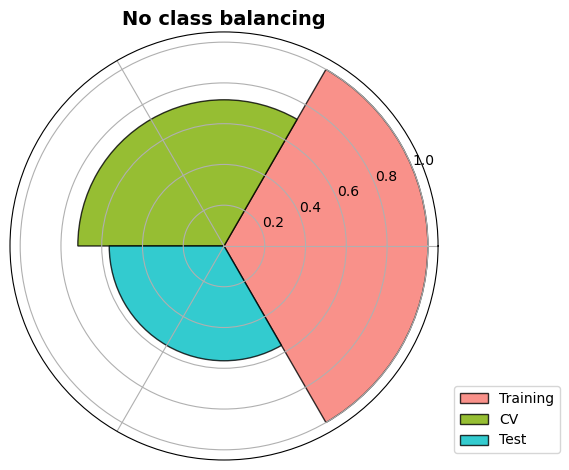

In [77]:
# No class balancing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

data = df.iloc[0,:]

N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data
width = 2 * np.pi / N

ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)
ax.xaxis.set_ticks(theta)

#ax.set_xticklabels(radii.index, fontsize=14)
ax.set_xticklabels(['','',''])
ax.tick_params(axis='x', which='major')

cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

for r, bar in zip(theta, bars):
    #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
    bar.set_facecolor(cmap(r / np.pi / 2))
    bar.set_alpha(0.8)
    bar.set_edgecolor('black')

ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

ax.set_title('No class balancing', fontsize=14, fontweight='bold', pad=5) # Training set

plt.tight_layout()
plt.savefig('Figure_polarplot_MCC_df1.pdf')

In [78]:
# Custom function for making polar plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def make_polar_plot(data, plotlabel):
    N = len(data)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = data
    width = 2 * np.pi / N
    
    ax = plt.subplot(111, polar=True)
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    ax.xaxis.set_ticks(theta)

    #ax.set_xticklabels(radii.index, fontsize=14)
    ax.set_xticklabels(['','',''])
    ax.tick_params(axis='x', which='major')
    
    cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])
    
    for r, bar in zip(theta, bars):
        #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
        bar.set_facecolor(cmap(r / np.pi / 2))
        bar.set_alpha(0.7)
        bar.set_edgecolor('black')
    #ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )
    ax.set_title(plotlabel, fontsize=14, fontweight='bold', pad=5) # Training set
    
    txt = plotlabel.split()
    txt2 = [x.capitalize() for x in txt]
    txt3 = ''.join(txt2)
    
    plt.tight_layout()
    plt.savefig(f'Figure_polarplot_MCC_{txt3}.pdf')

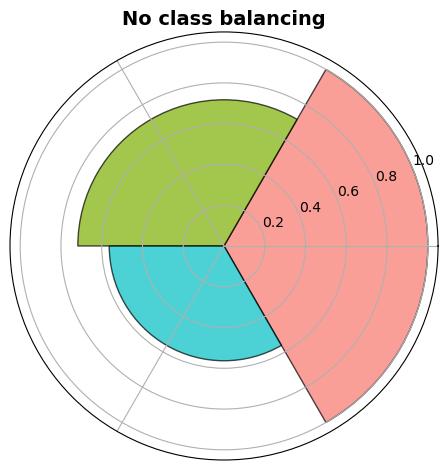

In [79]:
# No class balancing
data = df.iloc[0,:]

make_polar_plot(data, 'No class balancing')

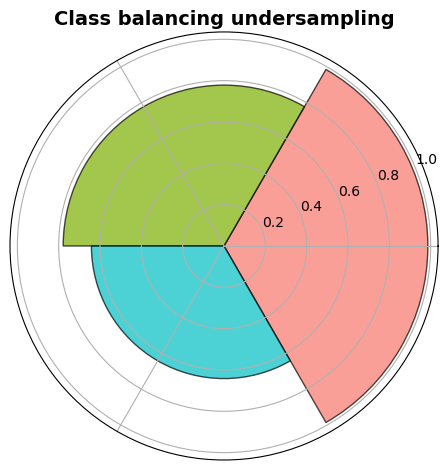

In [80]:
# Class balancing (undersampling)
data = df.iloc[1,:]

make_polar_plot(data, 'Class balancing undersampling')

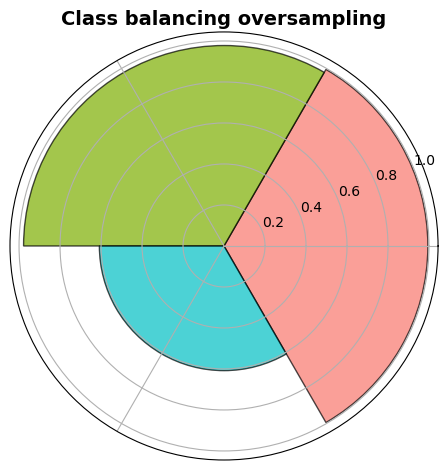

In [81]:
# Class balancing (oversampling)
data = df.iloc[2,:]

make_polar_plot(data, 'Class balancing oversampling')


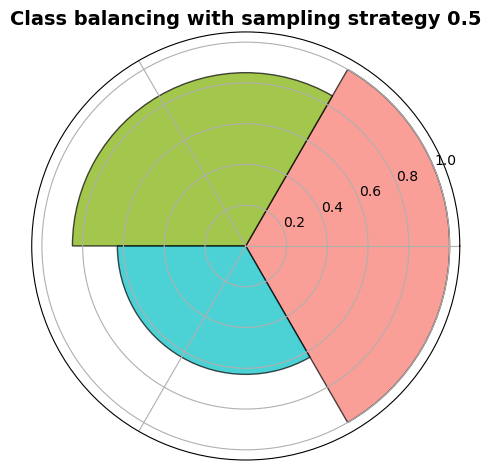

In [82]:
# Class balancing (with sampling strategy of 0.5)
data = df.iloc[3,:]

make_polar_plot(data, 'Class balancing with sampling strategy 0.5')